In [1]:
import pandas as pd

# Data Loading

In [2]:
from api.NN_api import DataHandler

# Creation of a DataHandler Object
data_handler = DataHandler(['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'])

# Number of different Datasets
datasets_number = 3

# Lists of DataFrames
df_train : list[pd.DataFrame] = []
df_test  : list[pd.DataFrame] = []

# Load the Training/Test sets into pandas DataFrames
for i in range(datasets_number):
    df_train.append(data_handler.load_data(f'data/monks/monks-{i+1}.train'))
    df_test.append(data_handler.load_data(f'data/monks/monks-{i+1}.test'))

    # Print the head of the loaded data
    print(df_train[i].head())
    print(df_test[i].head())


     target  col1  col2  col3  col4  col5  col6       id
NaN       1     1     1     1     1     3     1   data_5
NaN       1     1     1     1     1     3     2   data_6
NaN       1     1     1     1     3     2     1  data_19
NaN       1     1     1     1     3     3     2  data_22
NaN       1     1     1     2     1     2     1  data_27
     target  col1  col2  col3  col4  col5  col6      id
NaN       1     1     1     1     1     1     1  data_1
NaN       1     1     1     1     1     1     2  data_2
NaN       1     1     1     1     1     2     1  data_3
NaN       1     1     1     1     1     2     2  data_4
NaN       1     1     1     1     1     3     1  data_5
     target  col1  col2  col3  col4  col5  col6       id
NaN       0     1     1     1     1     2     2   data_4
NaN       0     1     1     1     1     4     1   data_7
NaN       0     1     1     1     2     1     1   data_9
NaN       0     1     1     1     2     1     2  data_10
NaN       0     1     1     1     2 

# Data Split

In [3]:
# Lists of data
x_train : list[pd.DataFrame] = []
y_train : list[pd.DataFrame] = []
x_test  : list[pd.DataFrame] = []
y_test  : list[pd.DataFrame] = []

# Split data into TR set and TS set
for i in range(datasets_number):

    # Saving the splitted TR set data into the lists
    x, y = data_handler.split_data(data=df_train[i], target_col='target', drop_cols=['target', 'id'])
    x_train.append(x)
    y_train.append(y)

    # Saving the splitted TS set data into the lists
    x, y = data_handler.split_data(df_test[i], target_col='target', drop_cols=['target', 'id'])
    x_test.append(x)
    y_test.append(y)


# 1-Hot Encoding

In [4]:
# Applies the 1-Hot Encoding to the "x" data
for i in range(datasets_number):
    x_train[i] = data_handler.one_hot_encoding(x_train[i])
    x_test[i]  = data_handler.one_hot_encoding(x_test[i])

    # Print of the data modified
    print(x_train[i].head())
    print(x_test[i].head())

     col1_1  col1_2  col1_3  col2_1  col2_2  col2_3  col3_1  col3_2  col4_1  \
NaN     1.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     1.0   
NaN     1.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     1.0   
NaN     1.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
NaN     1.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
NaN     1.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0     1.0   

     col4_2  col4_3  col5_1  col5_2  col5_3  col5_4  col6_1  col6_2  
NaN     0.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0  
NaN     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
NaN     0.0     1.0     0.0     1.0     0.0     0.0     1.0     0.0  
NaN     0.0     1.0     0.0     0.0     1.0     0.0     0.0     1.0  
NaN     0.0     0.0     0.0     1.0     0.0     0.0     1.0     0.0  
     col1_1  col1_2  col1_3  col2_1  col2_2  col2_3  col3_1  col3_2  col4_1  \
NaN     1.0     0.0     0.

# Grid Search parameters

In [5]:
# Parameters' space for Grid Search (1 for each Dataset)
param_space = {
    0: {
        'input_units': [17],
        'hidden_units': [1, 2, 3, 4],
        'learning_rate': [float(i/100) for i in range(1,10)], #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999],
        'batch_size': [8, 16, 32, 64, 128],
        'epochs': [int(250+epochs) for epochs in range(0,200,20)],
        'weight_decay': [float(i/100) for i in range(1,10)] + [0.01, 0.001], #[0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
        'momentum': [float(i/100) for i in range(4,9)], #[0.5, 0.6, 0.7, 0.8],
        'activation': ['tanh', 'relu'],
        'output_activation': ['sigmoid'],
        'metrics': ['accuracy']
        #'metrics_for_regularization': [] # IGNORED
    },
    1: {
        'input_units': [17],
        'hidden_units': [3, 4],
        'learning_rate': [float(i/100) for i in range(1,101,5)] + [0.999, 0.9999], #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999],
        'batch_size': [8, 16, 32, 64, 128],
        'epochs': [int(250+epochs) for epochs in range(0,200,20)],
        'weight_decay': [float(i/1000) for i in range(1,101,5)] + [0.001, 0.0001], #[0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
        'momentum': [float(i/100) for i in range(50,90,5)], #[0.5, 0.6, 0.7, 0.8],
        'activation': ['tanh', 'relu'],
        'output_activation': ['sigmoid'],
        'metrics': ['accuracy']
        #'metrics_for_regularization': [] # IGNORED
    },
    2: {
        'input_units': [17],
        'hidden_units': [3, 4],
        'learning_rate': [float(i/100) for i in range(1,101,5)] + [0.999, 0.9999], #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999],
        'batch_size': [10, 15, 30, 60],
        'epochs': [int(250+epochs) for epochs in range(0,200,20)],
        'weight_decay': [float(i/1000) for i in range(1,101,5)] + [0.001, 0.0001], #[0.001, 0.003, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
        'momentum': [float(i/100) for i in range(50,90,5)], #[0.5, 0.6, 0.7, 0.8],
        'activation': ['tanh', 'relu'],
        'output_activation': ['sigmoid'],
        'metrics': ['accuracy']
        #'metrics_for_regularization': [] # NOT IGNORED
    },
}

# MONK 3:
# TS acc = 0.967 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.4, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.001, 'momentum': 0.6, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.946 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.01, 'momentum': 0.8, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.949 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.2, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.005, 'momentum': 0.8, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}

# MONK 2:
# TS acc = 1.000 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.5, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.02, 'momentum': 0.8, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 1.000 {'input_units': 17, 'units': 3, 'optimizer': 'sgd', 'learning_rate': 0.5, 'batch_size': 30, 'epochs': 390, 'weight_decay': 0.03, 'momentum': 0.6, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}

# MONK 1:
# TS acc = 1.000 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.3, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.02, 'momentum': 0.5, 'activation': 'tanh', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
# TS acc = 0.991 {'input_units': 17, 'units': 4, 'optimizer': 'sgd', 'learning_rate': 0.4, 'batch_size': 15, 'epochs': 390, 'weight_decay': 0.05, 'momentum': 0.5, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}


# Model Selection

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from api.NN_api import BinaryNN

# Creation of a BinaryNN objct for each dataset
nn: list[BinaryNN] = []

# Different values per dataset
trials_list = [30, 30, 50]
k_values = [5, 5, 5]

# Search of the best Hyperparameters to each Training set
for dataset_i in range(datasets_number):
    X = x_train[dataset_i].values
    y = y_train[dataset_i].values
    k = k_values[dataset_i]

    # K-fold Cross-validation
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # For each iteration we choose the hyperparameters (randomly) and we use them with K-fold CV
    for i in range(trials_list[dataset_i]):
        
        # Random parameters
        params = data_handler.random_dictionary(param_space[dataset_i])

        # Creation of the Neural Network object
        nn_i = BinaryNN(params=params, monk_i=dataset_i+1, trial=i+1)

        # For each K-fold returns the indexes of the data splitted in: <X_train,y_train> and <X_val,y_val>
        for train_index, val_index in kfold.split(X, y):
            x_kfold_train, x_kfold_val = X[train_index], X[val_index]
            y_kfold_train, y_kfold_val = y[train_index], y[val_index]

            # Building the model
            nn_i.create_model(n_hidden_layers=1)

            # Training the model
            nn_i.fit(
                x_train=x_kfold_train,
                y_train=y_kfold_train,
                x_val=x_kfold_val,
                y_val=y_kfold_val
            )

            # Evaluating the model
            nn_i.evaluate(
                x_train=x_kfold_train,
                y_train=y_kfold_train,
                x_val=x_kfold_val,
                y_val=y_kfold_val
            )

        # Case of first append
        if len(nn) == dataset_i:
            nn.append(nn_i)
        
        # Print the results of this trial
        print("------------------ Current Hyperparameters ------------------")
        nn_i.print_training_info()
        print("--------------- Currently best Hyperparameters --------------")
        nn[dataset_i].print_training_info()
        print("\n\n")

        # Update best hyperparameters if: no high overfitting AND (higher mean VL accuracy OR (equal mean AND
        if nn_i.mean_tr_accuracy-0.1 <= nn_i.mean_vl_accuracy \
            and (
                    nn[dataset_i].mean_vl_accuracy < nn_i.mean_vl_accuracy \
                or (
                    nn[dataset_i].mean_vl_accuracy == nn_i.mean_vl_accuracy and nn[dataset_i].mean_tr_accuracy < nn_i.mean_tr_accuracy
                    )
            ):
            # debug
            #print(f"--- BETTER NN PARAMETERS FOUND [{nn[dataset_i].mean_vl_accuracy} < {nn_i.mean_vl_accuracy} OR (equals AND {nn[dataset_i].mean_tr_accuracy} < {nn_i.mean_tr_accuracy})] ---")
            nn[dataset_i] = nn_i
        
        # Case of best Hyperparameters already found
        if nn[dataset_i].mean_tr_accuracy == float(1) and nn[dataset_i].mean_vl_accuracy == float(1):
            # debug
            #print(f"--- TR={nn[dataset_i].mean_tr_accuracy} VL={nn[dataset_i].mean_vl_accuracy} FOUND ---")
            break
    
    print(f"### Best Hyperparameters of Monk {dataset_i+1} ###")
    nn[dataset_i].print_training_info()





------------------ Current Hyperparameters ------------------
 Monk:                     1
 Trial:                    1
 Hyperparameters:          {'input_units': 17, 'hidden_units': 2, 'learning_rate': 0.07, 'batch_size': 64, 'epochs': 330, 'weight_decay': 0.01, 'momentum': 0.04, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.4221107840538025
 Mean Validation Loss:     0.48853467106819154
 Mean Training Accuracy:   0.8487878918647767
 Mean Validation Accuracy: 0.790666651725769
--------------- Currently best Hyperparameters --------------
 Monk:                     1
 Trial:                    1
 Hyperparameters:          {'input_units': 17, 'hidden_units': 2, 'learning_rate': 0.07, 'batch_size': 64, 'epochs': 330, 'weight_decay': 0.01, 'momentum': 0.04, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.4221107840538025
 Mean Validation Loss:     0.48853467106819154
 M

# Print of best Hyperparameters and Plots


### Best Hyperparameters for Monk 1
 Monk:                     1
 Trial:                    24
 Hyperparameters:          {'input_units': 17, 'hidden_units': 3, 'learning_rate': 0.09, 'batch_size': 8, 'epochs': 310, 'weight_decay': 0.008, 'momentum': 0.06, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.0664612002670765
 Mean Validation Loss:     0.12057124674320222
 Mean Training Accuracy:   0.9858585834503174
 Mean Validation Accuracy: 0.959333336353302

### Best Hyperparameters for Monk 2
 Monk:                     2
 Trial:                    18
 Hyperparameters:          {'input_units': 17, 'hidden_units': 4, 'learning_rate': 0.01, 'batch_size': 8, 'epochs': 270, 'weight_decay': 0.021, 'momentum': 0.85, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.028473063185811043
 Mean Validation Loss:     0.030336084589362145
 Mean Training Accuracy:   1.0
 Mean Validation Ac

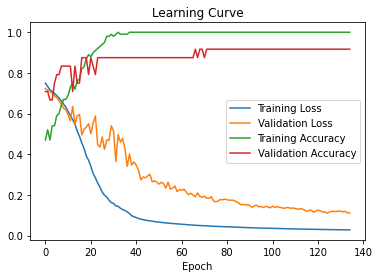

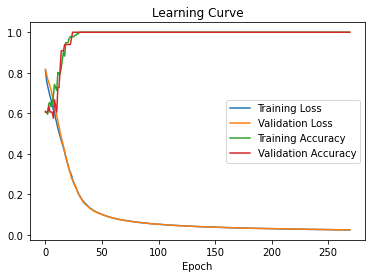

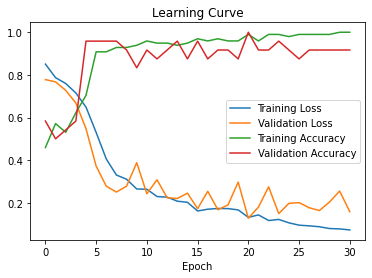

In [ ]:
# Iteration on all the Datasets
for dataset_i in range(datasets_number):

    # Print best hyperparameters
    print(f"\n### Best Hyperparameters for Monk {dataset_i+1}")
    nn[dataset_i].print_training_info()

    # Plot the learning curve
    nn[dataset_i].print_plot()

# Retraining Phase

In [ ]:
# Iterations on each Dataset
for dataset_i in range(datasets_number):

    # Reset of the model with same Hyperparameters
    nn[dataset_i] = BinaryNN(params=nn[dataset_i].params, monk_i=dataset_i+1, trial=1)
    
    # Building the model
    nn[dataset_i].create_model(n_hidden_layers=1)

    # Number of iteration of Retraining
    for _ in range(30):

        # Training the model
        nn[dataset_i].fit(
            x_train=x_train[dataset_i].values,
            y_train=y_train[dataset_i].values
        )

        # Evaluating the model
        nn[dataset_i].evaluate(
            x_train=x_train[dataset_i].values,
            y_train=y_train[dataset_i].values
        )

        # Print values
        print(f"\n### Retraining of Monk {dataset_i+1} ###")
        nn[dataset_i].print_training_info()

        # Plot the learning curve
        nn[dataset_i].print_plot()
        print(nn[dataset_i].history.history["val_accuracy"])


UnboundLocalError: local variable 'vl_loss' referenced before assignment

In [ ]:
# Iteration on all the Datasets
for dataset_i in range(datasets_number):

    # Print best hyperparameters
    print(f"\n### Best Hyperparameters for Monk {dataset_i+1}")
    nn[dataset_i].print_training_info()


### Best Hyperparameters for Monk 1
 Monk:                     1
 Trial:                    1
 Hyperparameters:          {'input_units': 17, 'hidden_units': 3, 'learning_rate': 0.09, 'batch_size': 8, 'epochs': 310, 'weight_decay': 0.008, 'momentum': 0.06, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.7324082255363464
 Mean Validation Loss:     0
 Mean Training Accuracy:   0.4838709533214569
 Mean Validation Accuracy: 0

### Best Hyperparameters for Monk 2
 Monk:                     2
 Trial:                    18
 Hyperparameters:          {'input_units': 17, 'hidden_units': 4, 'learning_rate': 0.01, 'batch_size': 8, 'epochs': 270, 'weight_decay': 0.021, 'momentum': 0.85, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.028473063185811043
 Mean Validation Loss:     0.030336084589362145
 Mean Training Accuracy:   1.0
 Mean Validation Accuracy: 1.0

### Best Hyperparamete

# Testing Phase

 Monk:                     1
 Trial:                    1
 Hyperparameters:          {'input_units': 17, 'hidden_units': 3, 'learning_rate': 0.09, 'batch_size': 8, 'epochs': 310, 'weight_decay': 0.008, 'momentum': 0.06, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.7324082255363464
 Mean Validation Loss:     0
 Test Loss:                0.7340896725654602
 Mean Training Accuracy:   0.4838709533214569
 Mean Validation Accuracy: 0
 Test Accuracy:            0.5069444179534912
 f1 score:                 0.27303754266211605
 f2 score:                 0.21253985122210417
 Prediction score:         0.5194805194805194
 Recall score:             0.18518518518518517

              Predicted_Class_0  Predicted_Class_1
Real_Class_0                179                 37
Real_Class_1                176                 40


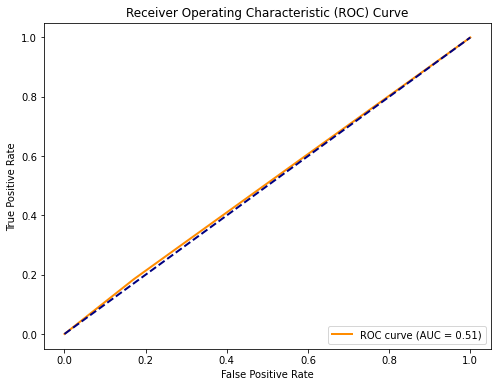

 Monk:                     2
 Trial:                    18
 Hyperparameters:          {'input_units': 17, 'hidden_units': 4, 'learning_rate': 0.01, 'batch_size': 8, 'epochs': 270, 'weight_decay': 0.021, 'momentum': 0.85, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.028473063185811043
 Mean Validation Loss:     0.030336084589362145
 Test Loss:                0.025255287066102028
 Mean Training Accuracy:   1.0
 Mean Validation Accuracy: 1.0
 Test Accuracy:            1.0
 f1 score:                 1.0
 f2 score:                 1.0
 Prediction score:         1.0
 Recall score:             1.0

              Predicted_Class_0  Predicted_Class_1
Real_Class_0                290                  0
Real_Class_1                  0                142


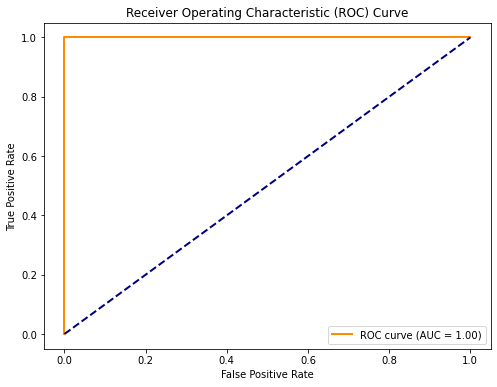

 Monk:                     3
 Trial:                    20
 Hyperparameters:          {'input_units': 17, 'hidden_units': 4, 'learning_rate': 0.46, 'batch_size': 60, 'epochs': 270, 'weight_decay': 0.021, 'momentum': 0.8, 'activation': 'relu', 'output_activation': 'sigmoid', 'metrics': 'accuracy'}
 Mean Training Loss:       0.13262352645397185
 Mean Validation Loss:     0.2543880857527256
 Test Loss:                0.1326725333929062
 Mean Training Accuracy:   0.965200936794281
 Mean Validation Accuracy: 0.9426666617393493
 Test Accuracy:            0.9768518805503845
 f1 score:                 0.9777777777777777
 f2 score:                 0.9700176366843034
 Prediction score:         0.990990990990991
 Recall score:             0.9649122807017544

              Predicted_Class_0  Predicted_Class_1
Real_Class_0                202                  2
Real_Class_1                  8                220


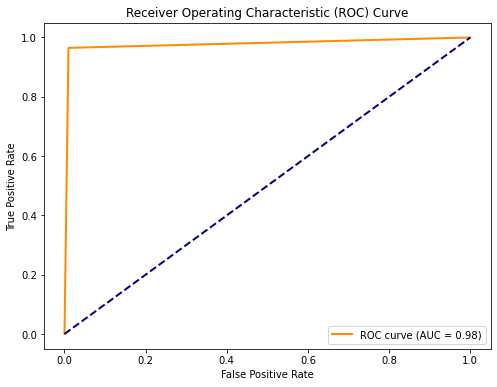

In [ ]:

# Evaluation of the Models for each Test set
for dataset_i in range(datasets_number):
    X = x_test[dataset_i].values
    y = y_test[dataset_i].values

    # Evaluate the Model on TS set
    nn[dataset_i].test(
        x_test=X,
        y_test=y
    )

    # Computes the score of the Model
    nn[dataset_i].score(x_test=X, y_test=y)

    # Prints the results obtained
    print(nn[dataset_i])
    nn[dataset_i].print_confusion_matrix(y_test=y)
    nn[dataset_i].print_roc_curve(y_test=y)


